<a href="https://colab.research.google.com/github/Orixtosius/RNN_Exercises/blob/main/AutoRegressive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [4]:
sinusWave = np.sin(0.1*np.arange(200))
sinusWave_2 = np.sin(0.01*np.arange(200))

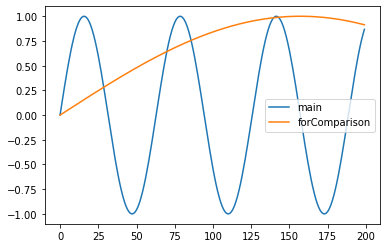

In [5]:
plt.plot(sinusWave, label = 'main')
plt.plot(sinusWave_2, label = 'forComparison')
plt.legend()

In [6]:
T = 10
X = []
Y = []

for t in range(len(sinusWave) - T):
  x = sinusWave[t:t+T]
  y = sinusWave[t+T]
  X.append(x)
  Y.append(y)

X = np.array(X)
X_r = X.reshape(-1, T)
Y = np.array(Y)
N = len(X)
Nr = len(X_r)

In [7]:
print(f"Shape of X is {X.shape} Reshaped X is {X_r.shape} and Shape of Y is {Y.shape}")
print(f"If the both X is the same ? : {np.mean(X == X_r)}")

Shape of X is (190, 10) Reshaped X is (190, 10) and Shape of Y is (190,)
If the both X is the same ? : 1.0


In [8]:
i = Input(shape = (T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(
    loss='mse',
    optimizer = Adam(learning_rate=0.1)
)

In [9]:
r = model.fit(
    X_r[:-Nr//2], Y[:-Nr//2],
    epochs = 80,
    validation_data = (X_r[-Nr//2:], Y[-Nr//2:],)
)

Epoch 1/80
3/3 [==============================] - 1s 84ms/step - loss: 0.1601 - val_loss: 0.0691
Epoch 2/80
3/3 [==============================] - 0s 15ms/step - loss: 0.1060 - val_loss: 0.0203
Epoch 3/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0329 - val_loss: 0.0604
Epoch 4/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0310 - val_loss: 0.0129
Epoch 5/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0363 - val_loss: 0.0180
Epoch 6/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0154 - val_loss: 0.0286
Epoch 7/80
3/3 [==============================] - 0s 22ms/step - loss: 0.0230 - val_loss: 0.0029
Epoch 8/80
3/3 [==============================] - 0s 24ms/step - loss: 0.0090 - val_loss: 0.0130
Epoch 9/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0063 - val_loss: 0.0042
Epoch 10/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0080 - val_loss: 0.0022
Epoch 11/80
3/3 [============

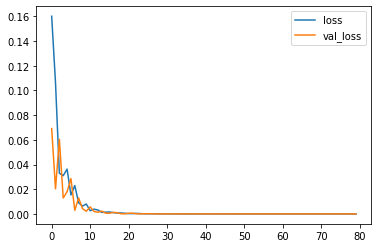

In [10]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

CORRECT IMPLEMENTATION OF TIME SERIES FORECASTING

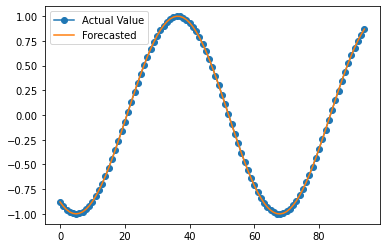

In [11]:
validation_target = Y[-Nr//2:]
validation_predictions = []

last_x = X_r[-Nr//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1))[0,0]
  validation_predictions.append(p)
  
  last_x = np.roll(last_x,-1)
  last_x[-1] = p

plt.plot(validation_target, marker='o', label = 'Actual Value')
plt.plot(validation_predictions, label = 'Forecasted')
plt.legend()

INCORRECT APPROACH

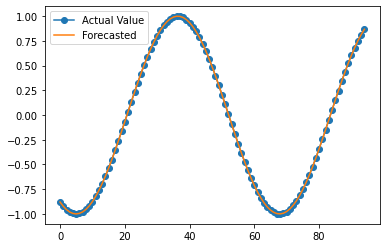

In [12]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]
i = -N//2

while( len(validation_predictions) < len(validation_target)):
  p = model.predict(X[i].reshape(1,-1))[0,0]
  i+=1
  validation_predictions.append(p)

plt.plot(validation_target, marker='o', label = 'Actual Value')
plt.plot(validation_predictions, label = 'Forecasted')
plt.legend()

No difference has been detected

Data With Noise kalın metin

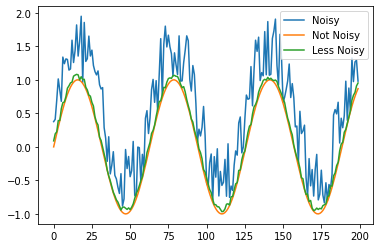

In [14]:
sinusWaveWithNoise = np.sin(0.1*np.arange(200)) + np.random.rand(200)
sinusWaveLowNoise = np.sin(0.1*np.arange(200)) + 0.1*np.random.rand(200)
sinusNoNoise = np.sin(0.1*np.arange(200))
plt.plot(sinusWave, label = 'Noisy')
plt.plot(sinusNoNoise, label = 'Not Noisy')
plt.plot(sinusWaveLowNoise, label = 'Less Noisy')
plt.legend()

In [20]:
T = 10
X = []
Y = []

for t in range(len(sinusWaveWithNoise) - T):
  x = sinusWaveWithNoise[t:t+T]
  y = sinusWaveWithNoise[t+T]
  X.append(x)
  Y.append(y)

X = np.array(X)
X_r = X.reshape(-1, T)
Y = np.array(Y)
N = len(X)
Nr = len(X_r)

In [21]:
i = Input(shape = (T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(
    loss='mse',
    optimizer = Adam(learning_rate=0.1)
)

In [22]:
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs = 80,
    validation_data = (X[-N//2:], Y[-N//2:],)
)

Epoch 1/80
3/3 [==============================] - 0s 63ms/step - loss: 6.6189 - val_loss: 1.1770
Epoch 2/80
3/3 [==============================] - 0s 23ms/step - loss: 1.4497 - val_loss: 1.7327
Epoch 3/80
3/3 [==============================] - 0s 25ms/step - loss: 3.0016 - val_loss: 1.5849
Epoch 4/80
3/3 [==============================] - 0s 17ms/step - loss: 1.8738 - val_loss: 0.6395
Epoch 5/80
3/3 [==============================] - 0s 25ms/step - loss: 0.6853 - val_loss: 0.8332
Epoch 6/80
3/3 [==============================] - 0s 17ms/step - loss: 1.0575 - val_loss: 1.1014
Epoch 7/80
3/3 [==============================] - 0s 16ms/step - loss: 1.0501 - val_loss: 0.6044
Epoch 8/80
3/3 [==============================] - 0s 16ms/step - loss: 0.4409 - val_loss: 0.2889
Epoch 9/80
3/3 [==============================] - 0s 16ms/step - loss: 0.3481 - val_loss: 0.3613
Epoch 10/80
3/3 [==============================] - 0s 24ms/step - loss: 0.5091 - val_loss: 0.3069
Epoch 11/80
3/3 [============

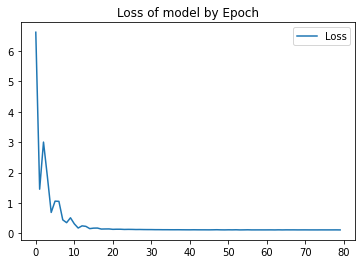

In [23]:
plt.title('Loss of model by Epoch')
plt.plot(r.history['loss'], label = 'Loss')
plt.legend()

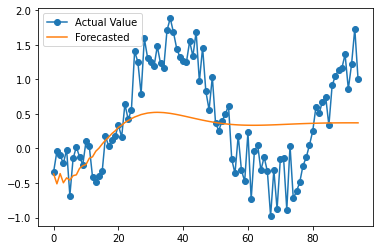

In [24]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while( len(validation_predictions) < len(validation_target)):
  p = model.predict(last_x.reshape(1,-1))[0,0]
  validation_predictions.append(p)
  
  last_x = np.roll(last_x,-1)
  last_x[-1] = p

plt.plot(validation_target, marker='o', label = 'Actual Value')
plt.plot(validation_predictions, label = 'Forecasted')
plt.legend()

In [25]:
T = 10
X = []
Y = []

for t in range(len(sinusWaveLowNoise) - T):
  x = sinusWaveLowNoise[t:t+T]
  y = sinusWaveLowNoise[t+T]
  X.append(x)
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)

i = Input(shape = (T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(
    loss='mse',
    optimizer = Adam(learning_rate=0.1)
)

r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs = 80,
    validation_data = (X[-N//2:], Y[-N//2:],)
)

Epoch 1/80
3/3 [==============================] - 0s 69ms/step - loss: 0.5733 - val_loss: 0.3751
Epoch 2/80
3/3 [==============================] - 0s 17ms/step - loss: 0.4057 - val_loss: 0.0994
Epoch 3/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0749 - val_loss: 0.1104
Epoch 4/80
3/3 [==============================] - 0s 18ms/step - loss: 0.1935 - val_loss: 0.0520
Epoch 5/80
3/3 [==============================] - 0s 20ms/step - loss: 0.0396 - val_loss: 0.0421
Epoch 6/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0780 - val_loss: 0.0561
Epoch 7/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0401 - val_loss: 0.0145
Epoch 8/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0335 - val_loss: 0.0564
Epoch 9/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0400 - val_loss: 0.0074
Epoch 10/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0160 - val_loss: 0.0252
Epoch 11/80
3/3 [============

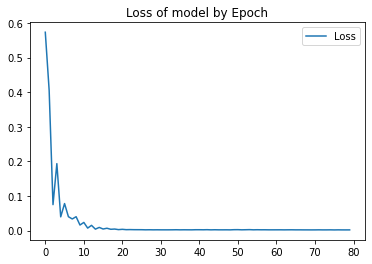

In [26]:
plt.title('Loss of model by Epoch')
plt.plot(r.history['loss'], label = 'Loss')
plt.legend()

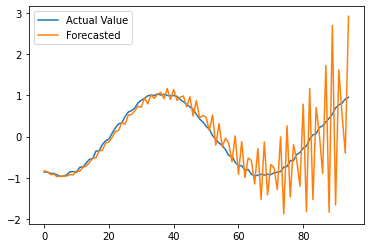

In [27]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while( len(validation_predictions) < len(validation_target)):
  p = model.predict(last_x.reshape(1,-1))[0,0]
  validation_predictions.append(p)
  
  last_x = np.roll(last_x,-1)
  last_x[-1] = p

plt.plot(validation_target, label = 'Actual Value')
plt.plot(validation_predictions, label = 'Forecasted')
plt.legend()